In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [2]:
df=pd.read_excel("weight-height.xlsx")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df1=df.copy()
df2=df.copy()

# Encode Dataset

In [5]:
from sklearn.preprocessing import LabelEncoder
lebel = LabelEncoder()

In [6]:
from pandas.core.dtypes.common import is_numeric_dtype

In [7]:
for col in df1.columns:
    if is_numeric_dtype(df1[col]):
        continue
    
    df1[col] = lebel.fit_transform(df1[col])

In [8]:
df1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [9]:
dataset=df1

In [10]:
df1 = pd.DataFrame(dataset,columns=['Gender','Height','Weight'])

# Separate dataset

In [11]:
x=df1[['Gender','Height']]
y=df1['Weight']

# Train dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain,xtest, ytrain,ytest=train_test_split(x,y,test_size=.30)

In [14]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [15]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [16]:
xtrain.head()

,Gender,Height
6144,0,65.002512
3868,1,69.048058
1493,1,73.995311
2364,1,69.742642
3371,1,70.030762


In [17]:
ytrain.head()

6144    156.057176
3868    187.468162
1493    213.371576
2364    199.891271
3371    205.847784
Name: Weight, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtest.head()

,Gender,Height
669,1,66.455602
2788,1,68.092965
3569,1,66.585093
8215,0,63.893188
8044,0,64.425369


# Applying Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [23]:
m = reg.coef_

In [24]:
c = reg.intercept_

In [25]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: Weight, Length: 8555, dtype: float64

In [26]:
reg.predict([[1,64.60]])

array([160.44158995])

In [27]:
df1['predicted results'] = reg.predict(x)

In [28]:
df1.head()

,Gender,Height,Weight,predicted results
0,1,73.847017,241.893563,215.777277
1,1,68.781904,162.310473,185.466799
2,1,74.110105,212.740856,217.351642
3,1,71.730978,220.042470,203.114550
4,1,69.881796,206.349801,192.048735


In [29]:
pred = reg.predict(xtest)

In [30]:
pred

array([171.5458217 , 181.34407241, 172.32071953, ..., 171.98867514,
       143.47354261, 159.45160988])

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mse = mean_squared_error(ytest, pred)

In [33]:
mse

98.08530866264259

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mae = mean_absolute_error(ytest, pred)

In [36]:
mae

7.955065771757427

# KNN Regressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [39]:
mse_val = [] #to store rmse values for different k
for K in range(5):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(xtrain, ytrain)  #fit the model
    pred=model.predict(xtest) #make prediction on test set
    error = sqrt(mean_squared_error(ytest,pred)) #calculate rmse
    mse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 14.785725255788481
RMSE value for k=  2 is: 12.531661258586036
RMSE value for k=  3 is: 11.664152000839612
RMSE value for k=  4 is: 11.35748199180678
RMSE value for k=  5 is: 11.076305542927996


<AxesSubplot:>

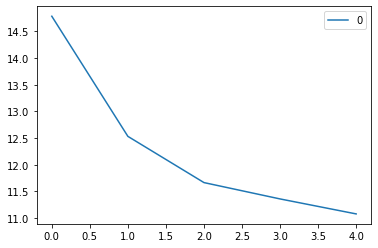

In [41]:
curve = pd.DataFrame(mse_val) #elbow curve 
curve.plot()

In [42]:
np.array(pred)


array([166.6732654 , 175.3657923 , 176.94227652, ..., 172.24267644,
       141.07857662, 160.52519278])

In [43]:
reg = KNeighborsRegressor(n_neighbors=5)
# fit the model using the training data and training targets
reg.fit(xtrain, ytrain)

KNeighborsRegressor()

In [44]:
print(reg.score(xtest, ytest))#accuracy

0.8817060221065722


# KNN Classifier

In [45]:
for col in df2.columns:
    if is_numeric_dtype(df2[col]):
        continue
    
    df2[col] = lebel.fit_transform(df2[col])

In [46]:
df2.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [47]:
dataset2=df2

In [48]:
df2 = pd.DataFrame(dataset2,columns=['Gender','Height','Weight'])

In [49]:
x2=df2[['Height','Weight']]
y2=df2['Gender']

In [50]:
x2

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [51]:
y2

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

In [52]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x2,y2, random_state=42, test_size=.30)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier()

In [63]:
ypred = classifier.predict(xtest)

In [64]:
ypred

array([0, 1, 1, ..., 0, 1, 0])

In [65]:
ypred

array([0, 1, 1, ..., 0, 1, 0])

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_roc_curve,roc_auc_score
cm = confusion_matrix(ytest, ypred)
ac = accuracy_score(ytest,ypred)

In [71]:
cm

array([[ 946,  120],
       [  92, 1409]], dtype=int64)

In [69]:
ac

0.917413322945072

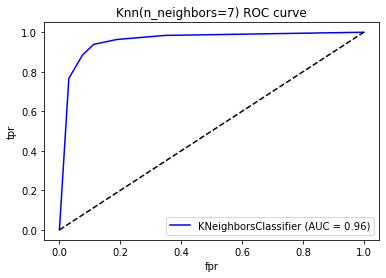

In [82]:
plot_roc_curve(classifier, xtest , ytest, color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [74]:
roc_auc_score(ytest, classifier.predict(xtest))#accuracy

0.9130685859208308

In [75]:
   from sklearn.metrics import classification_report

In [76]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1066
           1       0.92      0.94      0.93      1501

    accuracy                           0.92      2567
   macro avg       0.92      0.91      0.91      2567
weighted avg       0.92      0.92      0.92      2567

